## Lesson 7. Open and Plot Raster Data using Rasterio

This is the same as lesson 5 but with <code>rasterio</code>. <code>rioxarray</code> is preferable, however since I couldn't work out how to use <code>plotting_extent</code> with <code>rioxarray</code> (due to it needing the transform) it's probably good to do both.

In [2]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import rasterio as rio
from rasterio.plot import plotting_extent
import earthpy as et
import earthpy.plot as ep

In [3]:
sns.set(font_scale=1.5, style='white')

In [4]:
data_path = et.data.get_data('colorado-flood')

In [5]:
dem_pre_path = os.path.join(data_path,
                            'spatial',
                            'boulder-leehill-rd',
                            'pre-flood',
                            'lidar',
                            'pre_DTM.tif')

Open the file using a context manager (via the <code>with rio</code> statement.

In [9]:
with rio.open(dem_pre_path) as dem_src:
    dtm_pre_arr = dem_src.read(1, masked=True)

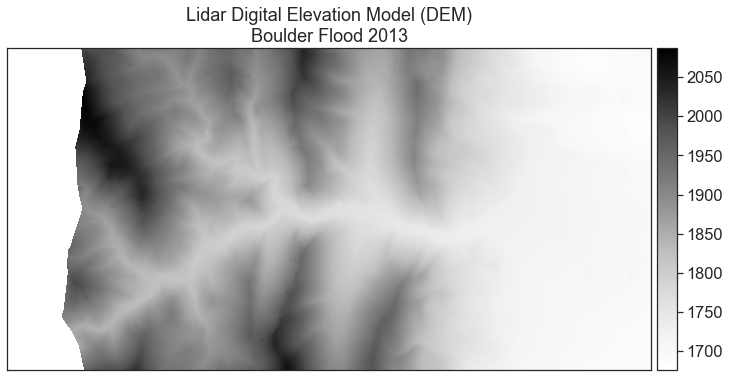

<AxesSubplot:title={'center':'Lidar Digital Elevation Model (DEM)\nBoulder Flood 2013'}>

In [10]:
ep.plot_bands(dtm_pre_arr,
              title='Lidar Digital Elevation Model (DEM)\nBoulder Flood 2013',
              cmap='Greys')
plt.show()

(<Figure size 864x576 with 1 Axes>,
 <AxesSubplot:title={'center':'Histogram of the Data with nodata Values Removed'}>)

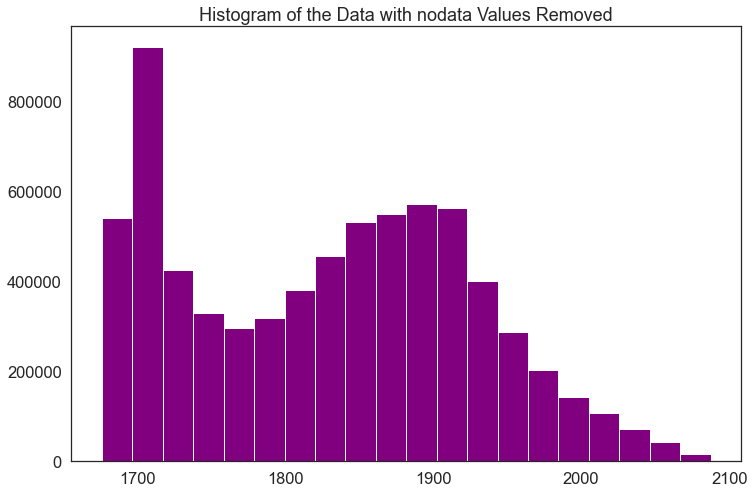

In [11]:
ep.hist(dtm_pre_arr,
        figsize=(12,8),
        title='Histogram of the Data with nodata Values Removed')
plt.show()

In [12]:
dtm_pre_arr.shape
type(dtm_pre_arr)

(2000, 4000)

numpy.ma.core.MaskedArray

The MaskedArray type is a numpy array that ensures that the nodata values will not be included in calculations.

Numpy arrays do not store spatial data. Access the spatial metadata using <code>dem_src.profile</code>

In [14]:
with rio.open(dem_pre_path) as dem_src:
    lidar_dem_im = dem_src.read([1], masked=True)
    lidar_dem_meta = dem_src.profile
    type(dem_src)
    
lidar_dem_meta

rasterio.io.DatasetReader

{'driver': 'GTiff', 'dtype': 'float32', 'nodata': -3.4028234663852886e+38, 'width': 4000, 'height': 2000, 'count': 1, 'crs': CRS.from_epsg(32613), 'transform': Affine(1.0, 0.0, 472000.0,
       0.0, -1.0, 4436000.0), 'blockxsize': 128, 'blockysize': 128, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}

In the above <code>dem_src</code> is a <code>rasterio</code> reader object.

In [15]:
with rio.open(dem_pre_path) as src:
    print(src)

<open DatasetReader name='C:/Users/Glen Shennan/earth-analytics/data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif' mode='r'>


In [16]:
print(src)

<closed DatasetReader name='C:/Users/Glen Shennan/earth-analytics/data/colorado-flood/spatial/boulder-leehill-rd/pre-flood/lidar/pre_DTM.tif' mode='r'>


In [17]:
dtm_pre_arr

masked_array(
  data=[[--, --, --, ..., 1695.6300048828125, 1695.419921875,
         1695.429931640625],
        [--, --, --, ..., 1695.5999755859375, 1695.5399169921875,
         1695.3599853515625],
        [--, --, --, ..., 1695.3800048828125, 1695.43994140625,
         1695.3699951171875],
        ...,
        [--, --, --, ..., 1681.449951171875, 1681.3900146484375, 1681.25],
        [--, --, --, ..., 1681.719970703125, 1681.5699462890625,
         1681.5599365234375],
        [--, --, --, ..., 1681.8900146484375, 1681.8099365234375,
         1681.739990234375]],
  mask=[[ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        ...,
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False],
        [ True,  True,  True, ..., False, False, False]],
  fill_value=-3.4028235e+38,
  dtype=float32)

In [18]:
with rio.open(dem_pre_path) as dem_src:
    lidar_dem_plot_ext = plotting_extent(dem_src)
    
lidar_dem_plot_ext

(472000.0, 476000.0, 4434000.0, 4436000.0)

**Plot Raster and Vector Data Together: Plot Extents**

Since the numpy array does not contain spatial data the <code>plotting_extent</code> object is needed to define the spatial extent of the array for plotting.

In [19]:
site_bdy_path = os.path.join(data_path,
                             'spatial',
                             'boulder-leehill-rd',
                             'clip-extent.shp')
site_bdy_shp = gpd.read_file(site_bdy_path)

<AxesSubplot:>

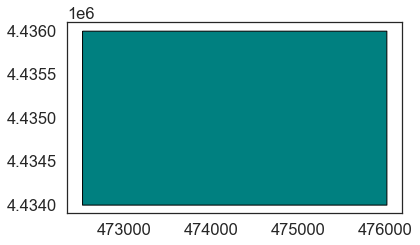

In [21]:
site_bdy_shp.plot(color='teal',
                  edgecolor='black')
plt.show()

<AxesSubplot:>

<AxesSubplot:>

(472000.0, 476210.9883720931, 4434000.0, 4436000.0)

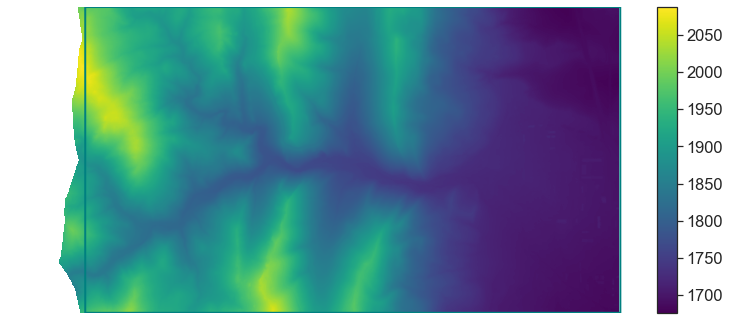

In [25]:
f, ax = plt.subplots(figsize=(12,12))

ep.plot_bands(dtm_pre_arr,
              ax=ax,
              extent=lidar_dem_plot_ext,
              cmap='viridis')

site_bdy_shp.plot(color='None',
                  edgecolor='teal',
                  linewidth=2,
                  ax=ax)
ax.axis('off')
plt.show()